# Autoencoders - Approach 1

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

These are the necessary imports for creating and training the autoencoder. It imports the required Keras layers and modules, as well as other libraries such as NumPy and Matplotlib.

In [ ]:
encoding_dim = 15
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

`encoding_dim` is the number of dimensions of the encoded representation (i.e., the size of the hidden layer). In this case, it is set to 15.
The next line defines the input layer for the autoencoder. The `Input` class from Keras is used to specify the shape of the input data. In this case, the input data is a flattened image of size 784 (28x28), representing the MNIST images.

The next line creates the encoder part of the autoencoder. The Dense layer is a fully connected layer with `encoding_dim` neurons and ReLU activation function. It takes the input data (`input_img`) and produces the encoded representation (`encoded`).

The next line creates the decoder part of the autoencoder. Another `Dense` layer is used with 784 neurons (the same size as the input data) and a `sigmoid` activation function. The decoder takes the encoded representation (`encoded`) and reconstructs the original input data (`decoded`).

The last line creates the full autoencoder model by specifying the input and output layers. The `Model` class from Keras is used to define the `autoencoder`.

In [ ]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

##### 1) This line creates the encoder model separately by using the same input layer but stopping at the encoded layer. The encoder model will be used later to extract the encoded representation from the input data.
##### 2) This line defines a new input layer for the decoder model. This input will be used to provide the encoded representation to the decoder.
##### 3) This line extracts the last layer of the autoencoder, which is the decoder layer.
##### 4) This line creates the decoder model separately using the encoded_input as input and connecting it to the decoder layer.

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

This line compiles the autoencoder model. We use the Adam optimizer and the binary cross-entropy loss function, which is suitable for binary image data.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod( )))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


##### 1) The first line loads the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits (0 to 9). The dataset is divided into training (x_train) and testing (x_test) sets.
##### 2) The next two lines normalize the pixel values of the images to the range [0, 1]. This is a common preprocessing step for neural network input data.
##### 3) The MNIST images are originally 28x28 pixels, but to use them as input to the autoencoder, we need to flatten each image into a 1D vector of size 784 (28 * 28 = 784). The reshape method is used to transform the data accordingly.


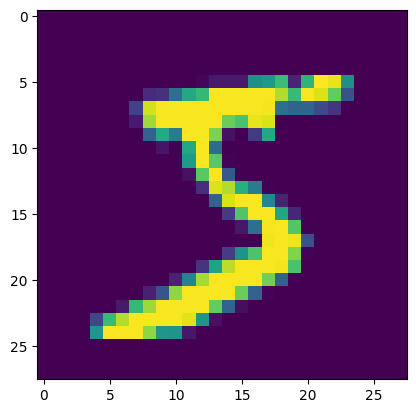

In [ ]:
plt.imshow(x_train[0].reshape(28,28))

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 5s 15ms/step - loss: 0.3052 - val_loss: 0.2210
Epoch 2/15
235/235 [==============================] - 3s 12ms/step - loss: 0.2017 - val_loss: 0.1841
Epoch 3/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1745 - val_loss: 0.1638
Epoch 4/15
235/235 [==============================] - 3s 13ms/step - loss: 0.1593 - val_loss: 0.1532
Epoch 5/15
235/235 [==============================] - 2s 11ms/step - loss: 0.1515 - val_loss: 0.1475
Epoch 6/15
235/235 [==============================] - 4s 16ms/step - loss: 0.1472 - val_loss: 0.1443
Epoch 7/15
235/235 [==============================] - 4s 18ms/step - loss: 0.1444 - val_loss: 0.1419
Epoch 8/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1424 - val_loss: 0.1400
Epoch 9/15
235/235 [==============================] - 3s 13ms/step - loss: 0.1406 - val_loss: 0.1384
Epoch 10/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1391 - val_lo

This line trains the autoencoder using the training data (x_train) as both input and target. The model is trained for 15 epochs (complete passes through the training data), with a batch size of 256. We also use the validation data (x_test) to monitor the model's performance during training.

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

These lines use the trained encoder and decoder models to obtain the encoded representation (`encoded_img`) of the test data and then decode it to obtain the reconstructed images (`decoded_img`).

313/313 [==============================] - 0s 1ms/step


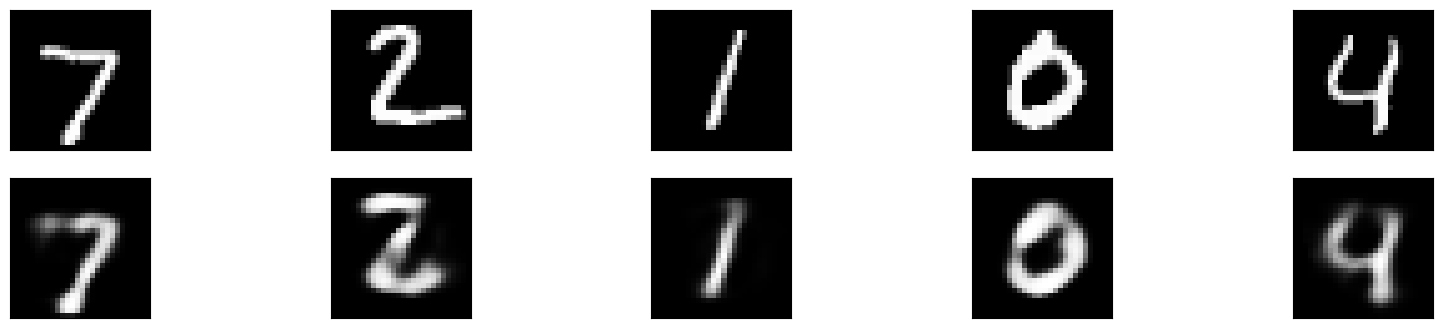

In [ ]:

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

These lines visualize the first 5 original and reconstructed images side by side for visual comparison. The original images are displayed on the top row, and the reconstructed images are displayed on the bottom row.

# Different approach

Epoch 1/15
235/235 [==============================] - 7s 23ms/step - loss: 0.2441 - val_loss: 0.1678
Epoch 2/15
235/235 [==============================] - 4s 17ms/step - loss: 0.1516 - val_loss: 0.1373
Epoch 3/15
235/235 [==============================] - 4s 17ms/step - loss: 0.1330 - val_loss: 0.1270
Epoch 4/15
235/235 [==============================] - 5s 22ms/step - loss: 0.1255 - val_loss: 0.1212
Epoch 5/15
235/235 [==============================] - 4s 17ms/step - loss: 0.1203 - val_loss: 0.1165
Epoch 6/15
235/235 [==============================] - 4s 17ms/step - loss: 0.1159 - val_loss: 0.1128
Epoch 7/15
235/235 [==============================] - 5s 22ms/step - loss: 0.1122 - val_loss: 0.1085
Epoch 8/15
235/235 [==============================] - 4s 17ms/step - loss: 0.1085 - val_loss: 0.1059
Epoch 9/15
235/235 [==============================] - 4s 17ms/step - loss: 0.1060 - val_loss: 0.1035
Epoch 10/15
235/235 [==============================] - 5s 21ms/step - loss: 0.1037 - val_lo

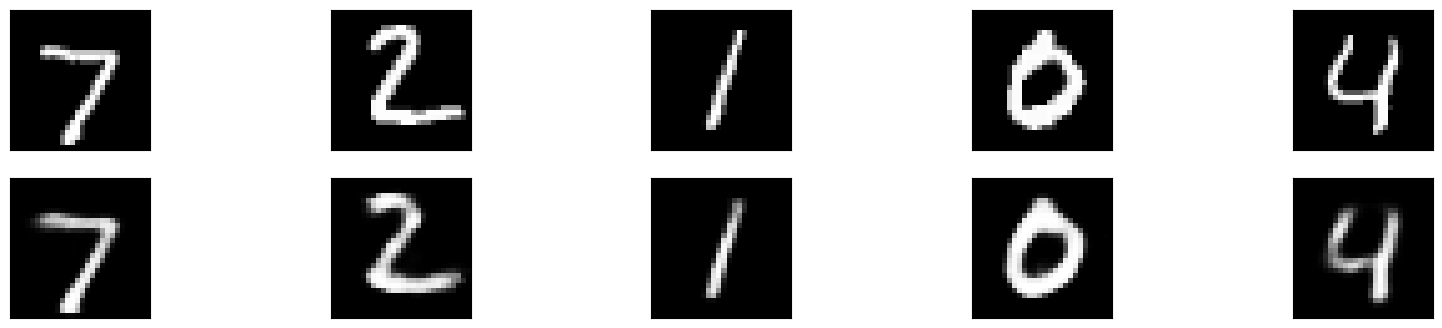

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
# These lines import the necessary modules from Keras and load the MNIST dataset.
# The MNIST dataset contains grayscale images of handwritten digits from 0 to 9.


# Normalize the pixel values to [0, 1]
# This step normalizes the pixel values of the images to the range [0, 1].
# This is a common preprocessing step for neural network input data,
# and it helps in faster convergence during training.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images to 784-dimensional vectors
# The MNIST images are originally 28x28 pixels, but to use them as input to the
# autoencoder, we need to flatten each image into a 1D vector of size
# 784 (28 * 28 = 784). The reshape method is used to transform the data
# accordingly.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define the encoder architecture
# These lines define the encoder part of the autoencoder. The encoder consists
# of three fully connected (Dense) layers. The first layer has 128 neurons,
# the second layer has 64 neurons, and the third layer has 32 neurons.
# Each layer uses the ReLU activation function.
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define the decoder architecture
# These lines define the decoder part of the autoencoder.
# The decoder also consists of three fully connected (Dense) layers.
# The first layer has 64 neurons, the second layer has 128 neurons,
# and the third layer has 784 neurons (the same size as the input data).
# The first two layers use the ReLU activation function, while the last
# layer uses the sigmoid activation function. The sigmoid activation function
# is used because we want the output of the autoencoder to be in the range
# [0, 1], which corresponds to the pixel values of the grayscale images.
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create the autoencoder model
# This line creates the full autoencoder model by specifying the input and
# output layers. The Model class from Keras is used to define the autoencoder.
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
# This line compiles the autoencoder model. We use the Adam optimizer and
# the binary cross-entropy loss function, which is suitable for binary image
# data. The binary cross-entropy loss function is commonly used for image
# reconstruction tasks.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
# This line trains the autoencoder using the training data (x_train) as both
# input and target. The model is trained for 15 epochs (complete passes
# through the training data), with a batch size of 256. We also use the
# validation data (x_test) to monitor the model's performance during training.
autoencoder.fit(x_train, x_train, epochs=15, batch_size=256, validation_data=(x_test, x_test))

# Generate the reconstructed images
# This line uses the trained autoencoder to reconstruct the test data (x_test).
# The reconstructed images are stored in the reconstructed_imgs variable.
reconstructed_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed images
# These lines visualize the first 5 original and reconstructed images side by
# side for visual comparison. The original images are displayed on the top
# row, and the reconstructed images are displayed on the bottom row.
# The imshow function from Matplotlib is used to display the images,
# and the get_xaxis() and get_yaxis() methods are used to hide the axis
# ticks for better visualization.
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Auto-encoder for CIFAR-10 dataset

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images to 3072-dimensional vectors (32x32x3 = 3072)
x_train = x_train.reshape((len(x_train), 3072))
x_test = x_test.reshape((len(x_test), 3072))

# Define the encoder architecture
input_img = Input(shape=(3072,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)

# Define the decoder architecture
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(3072, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=15, batch_size=128, validation_data=(x_test, x_test))

# Generate the reconstructed images
reconstructed_imgs = autoencoder.predict(x_test)



170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/15
391/391 [==============================] - 45s 107ms/step - loss: 0.6211 - val_loss: 0.5999
Epoch 2/15
391/391 [==============================] - 53s 136ms/step - loss: 0.5940 - val_loss: 0.5908
Epoch 3/15
391/391 [==============================] - 40s 104ms/step - loss: 0.5883 - val_loss: 0.5868
Epoch 4/15
391/391 [==============================] - 38s 98ms/step - loss: 0.5846 - val_loss: 0.5839
Epoch 5/15
391/391 [==============================] - 36s 92ms/step - loss: 0.5823 - val_loss: 0.5819
Epoch 6/15
391/391 [==============================] - 39s 99ms/step - loss: 0.5805 - val_loss: 0.5813
Epoch 7/15
391/391 [==============================] - 41s 106ms/step - loss: 0.5792 - val_loss: 0.5802
Epoch 8/15
391/391 [==============================] - 41s 106ms/step - loss: 0.5781 - val_loss: 0.5781
Epoch 9/15
391/391 [==============================] - 39s 100ms/step - loss: 0.5770 - val_loss: 0.5777
Epoch 10/

In [ ]:
# Visualize the original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(reconstructed_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstructed')
plt.show()

## Better version

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Define the encoder architecture
input_img = Input(shape=(32, 32, 3))
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)

# Define the decoder architecture
decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder with Mean Squared Error (MSE) loss
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data to 32x32x3 and use the same data for both input and output
x_train = x_train.reshape((len(x_train), 32, 32, 3))
x_test = x_test.reshape((len(x_test), 32, 32, 3))

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=15, batch_size=128, validation_data=(x_test, x_test))

# Generate the reconstructed images
reconstructed_imgs = autoencoder.predict(x_test)


170498071/170498071 [==============================] - 5s 0us/step
Epoch 1/15
391/391 [==============================] - 331s 839ms/step - loss: 0.0107 - val_loss: 0.0053
Epoch 2/15
391/391 [==============================] - 325s 832ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 3/15
391/391 [==============================] - 322s 824ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 4/15
391/391 [==============================] - 330s 844ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 5/15
391/391 [==============================] - 323s 825ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/15
391/391 [==============================] - 330s 843ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 7/15
391/391 [==============================] - 322s 823ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 8/15
391/391 [==============================] - 320s 818ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/15
391/391 [==============================] - 322s 823ms/step - loss: 0.0027 - val_loss: 0.00

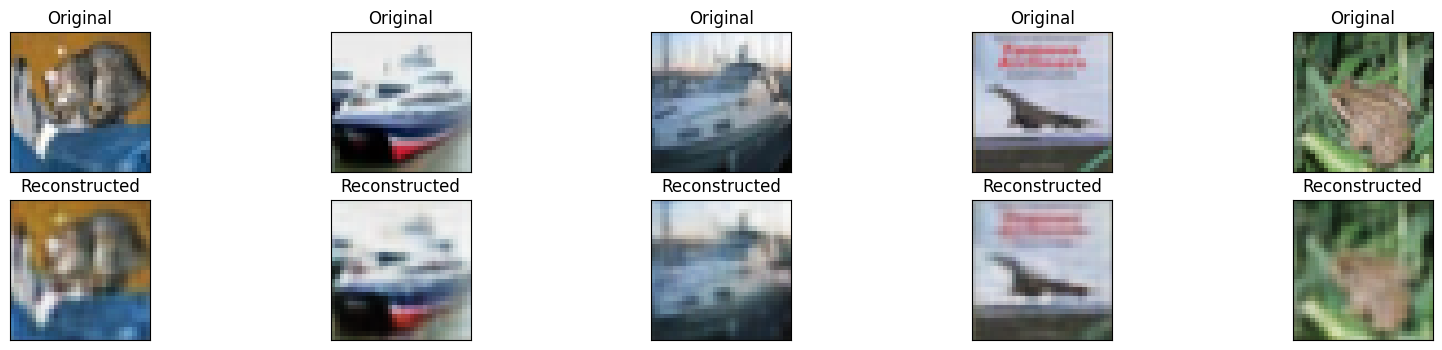

In [ ]:
# Visualize the original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(reconstructed_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstructed')
plt.show()


The terms "validation data" and "testing data" refer to two different datasets used for different purposes during the model development and evaluation process.

1. Validation Data:
Validation data, also known as the validation set or development set, is a portion of the dataset that is used during the training process to fine-tune the model's hyperparameters and monitor its performance. After each epoch (a single pass through the training data), the model's performance on the validation data is evaluated to determine if it is overfitting or underfitting. The validation data is not used for training the model; it is only used to tune the model's hyperparameters and assess its generalization ability.

2. Testing Data:
Testing data, also known as the test set, is a separate portion of the dataset that is used to evaluate the final performance of the trained model. The test data is kept completely separate from the training and validation data and is used only once at the end of the model development process. The model is evaluated on the test data to assess how well it generalizes to unseen examples and to provide an unbiased estimate of its performance on new data.

The main difference between validation data and testing data lies in their roles during the model development and evaluation process:

- Validation data is used during the training process to fine-tune the model's hyperparameters and avoid overfitting. It helps to monitor the model's performance during training and guide the selection of the best model configuration.

- Testing data is held out until the end of the model development process and is only used once to provide an unbiased estimate of the model's performance on new, unseen data. It gives an indication of how well the model is likely to perform in real-world scenarios.

In summary, validation data is used during model training to fine-tune the model, while testing data is used to assess the final performance and generalization ability of the trained model. Separating the data into training, validation, and testing sets is essential to avoid overfitting and ensure that the model's performance is accurately evaluated.